# Overview
- EDAを行なう

# Const

In [1]:
DIR_TRAIN = './../data_ignore/input/train/'
PATH_TRAIN_TP = './../data_ignore/input/train_tp.csv'

# Import everything I need:)

In [20]:
import numpy as np
import pandas as pd
from glob import glob
import soundfile as sf
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Preparation

In [18]:
trn_tp = pd.read_csv(PATH_TRAIN_TP)

# EDA

In [62]:
trn_tp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


<br>

recording_id が複数あるものを見る

In [76]:
trn_tp.groupby('recording_id')['species_id'].nunique()

recording_id
003bec244    1
006ab765f    1
007f87ba2    1
0099c367b    1
009b760e6    1
            ..
fe8d9ac40    1
fea6b438a    1
ff2eb9ce5    1
ffb8d8391    1
ffb9a7b9a    1
Name: species_id, Length: 1132, dtype: int64

In [77]:
idxs = trn_tp.groupby('recording_id')['species_id'].count() != 1
multi_species = trn_tp.groupby('recording_id').count()[idxs].index.values
print(len(multi_species))
multi_species

67


array(['03b96f209', '053aeb7bd', '11c2c02e5', '160add406', '16553d5cd',
       '178b835e3', '1aa00dc63', '21e2f2977', '287bf77ec', '2bcddf9a5',
       '2d09eb065', '2dc763e67', '2eb098e76', '33d0f2685', '34340b225',
       '349095631', '3c621e663', '400b7210c', '41829d963', '43d34d63c',
       '48fb5143f', '534db172e', '551385b05', '55b2b19d1', '561ed4362',
       '59a9eb657', '5b1e3b55b', '5bfe1dec6', '5db2e86fe', '5f8eecc9e',
       '5f9b4785b', '60b260508', '69aacafc4', '6bf2953a8', '6d93f853d',
       '71cf9646b', '728459067', '77299bde7', '774912d66', '7a9d46229',
       '9251fdbdd', '942ca05c0', '9a76cab9c', 'a2441a74b', 'a993402e2',
       'b056e5bc2', 'b55d2f7b4', 'b62b5a988', 'b7485fa88', 'bc9dd660e',
       'bd62d4fa2', 'bf964d1fa', 'c12e0a62b', 'c91cae4aa', 'cb5ddad47',
       'ccee900dd', 'd2cb96229', 'd58429096', 'd59d099b3', 'd80fab44f',
       'dd38bef4b', 'e42215aa0', 'e6de52902', 'ed2f84e75', 'ee3dc0bc6',
       'f3f82b897', 'f97ababc1'], dtype=object)

In [78]:
trn_tp.groupby('recording_id').count()['species_id'].value_counts()

1    1065
2      55
3       8
4       3
5       1
Name: species_id, dtype: int64

In [79]:
trn_tp['multi_labels'] = trn_tp['recording_id'].apply(lambda x: x in multi_species).values

In [80]:
idxs_multi_species = trn_tp['multi_species'] == True
print(np.sum(idxs_multi_species))
trn_tp[idxs_multi_species]

151


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,multi_species,multi_labels
19,03b96f209,16,4,30.9333,3093.75,32.7680,4593.75,True,True
20,03b96f209,16,4,49.6320,3093.75,51.4667,4593.75,True,True
28,053aeb7bd,23,4,9.8569,6459.96,17.7807,11627.90,True,True
29,053aeb7bd,23,4,0.9520,6459.96,8.8758,11627.90,True,True
75,11c2c02e5,15,1,17.6587,93.75,21.0027,1125.00,True,True
...,...,...,...,...,...,...,...,...,...
1154,ee3dc0bc6,17,1,47.0720,1312.50,53.5253,3937.50,True,True
1173,f3f82b897,19,1,53.7227,281.25,55.2747,2812.50,True,True
1174,f3f82b897,19,1,51.7013,281.25,53.2533,2812.50,True,True
1191,f97ababc1,15,1,10.8853,93.75,14.2293,1125.00,True,True


---

recording_id に複数のspeciesがあるもの

In [81]:
idxs = trn_tp.groupby('recording_id')['species_id'].nunique() != 1
multi_species = trn_tp.groupby('recording_id').nunique()[idxs].index.values
print(len(multi_species))
multi_species

27


array(['178b835e3', '1aa00dc63', '2bcddf9a5', '2d09eb065', '2eb098e76',
       '34340b225', '349095631', '400b7210c', '43d34d63c', '551385b05',
       '561ed4362', '5db2e86fe', '5f8eecc9e', '5f9b4785b', '60b260508',
       '6d93f853d', '71cf9646b', '77299bde7', '7a9d46229', 'b55d2f7b4',
       'b7485fa88', 'bf964d1fa', 'c12e0a62b', 'c91cae4aa', 'd58429096',
       'e42215aa0', 'ed2f84e75'], dtype=object)

In [82]:
trn_tp.groupby('recording_id').nunique()['species_id'].value_counts()

1    1105
2      25
3       2
Name: species_id, dtype: int64

In [83]:
trn_tp['multi_species'] = trn_tp['recording_id'].apply(lambda x: x in multi_species).values

In [84]:
idxs_multi_species = trn_tp['multi_species'] == True
print(np.sum(idxs_multi_species))
trn_tp[idxs_multi_species]

64


,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,multi_species,multi_labels
113,178b835e3,20,1,36.6453,2343.75,40.0853,5718.75,True,True
114,178b835e3,16,4,21.2267,3093.75,23.0613,4593.75,True,True
115,178b835e3,16,4,4.2560,3093.75,6.0907,4593.75,True,True
130,1aa00dc63,23,4,41.2328,6459.96,49.1566,11627.90,True,True
131,1aa00dc63,12,1,19.7867,562.50,22.9227,3281.25,True,True
...,...,...,...,...,...,...,...,...,...
1097,e42215aa0,4,1,1.3920,2343.75,3.2480,4218.75,True,True
1098,e42215aa0,23,4,4.3712,6459.96,12.2950,11627.90,True,True
1146,ed2f84e75,23,4,24.7815,6459.96,32.7053,11627.90,True,True
1147,ed2f84e75,22,1,19.8880,10687.50,21.4933,13687.50,True,True


# Spectrogram

In [10]:
path_flac_list = sorted(glob(f'{DIR_TRAIN}*'))
path_flac = path_flac_list[0]
y, sr = sf.read(path_flac)

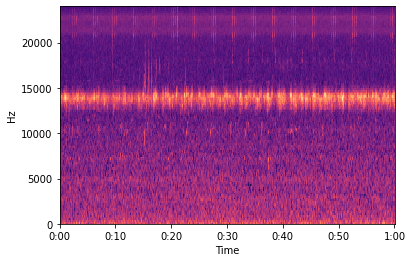

In [25]:
melspec = librosa.feature.melspectrogram(y, sr=sr)
melspec = librosa.power_to_db(melspec).astype(np.float32)
librosa.display.specshow(melspec, x_axis='time', y_axis='linear', sr=sr)
plt.show()
